In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

import os

from sklearn.model_selection import train_test_split 

In [3]:
import torch 
import torch.nn as nn 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 

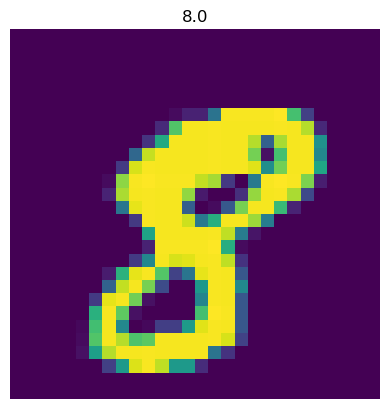

In [6]:
# load data 
train = pd.read_csv(r"./input/train.csv",dtype = np.float32)

# split data into pixels and labels(numbers from 0 to 9)
labels_numpy = train.label.values
pixels_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
pixels_train, pixels_test, labels_train, labels_test = train_test_split(pixels_numpy,
                                                                             labels_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
pixelsTrain = torch.from_numpy(pixels_train)
labelsTrain = torch.from_numpy(labels_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
pixelsTest = torch.from_numpy(pixels_test)
labelsTest = torch.from_numpy(labels_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(pixels_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(pixelsTrain,labelsTrain)
test = torch.utils.data.TensorDataset(pixelsTest,labelsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(pixels_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(labels_numpy[10]))
plt.savefig('output/image.png')
plt.show()